In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import networkx as nx

Se implementa la librería Plotly las cual permite explorar los datos con zoom, desplazamiento y etiquetas dinámicas.

Se agrega la librería networkx para construir un gráfico de conexiones sospechosas entre IPs. Esto permite visualizar patrones de ataques o conexiones inusuales.

Se modifica el código con la finalidad de tener :
✅ Gráficos interactivos con Plotly.
✅ Análisis de conexiones sospechosas con NetworkX.
✅ Corrección de value_counts() en gráficos de barras.
✅ Uso de mapas de calor para mejorar la visualización de eventos.

In [13]:
# Generación de datos simulados
np.random.seed(42)

eventos = ['login_success', 'login_failure', 'file_access', 'admin_login', 
           'password_change', 'firewall_block', 'suspicious_activity', 
           'malware_detected', 'port_scan']

fechas = pd.date_range(start='2023-01-01', periods=7)
timestamps = []
for fecha in fechas:
    for hora in range(24):
        for _ in range(3):
            timestamps.append(fecha + pd.Timedelta(hours=hora) + 
                             pd.Timedelta(minutes=np.random.randint(60)))

timestamps = timestamps[:500]

def random_ip():
    return f"{np.random.randint(1, 256)}.{np.random.randint(1, 256)}.{np.random.randint(1, 256)}.{np.random.randint(1, 256)}"

usuarios = ['admin', 'user1', 'user2', 'user3', 'system', 'guest', None]

data = {
    'timestamp': timestamps,
    'ip_origen': [random_ip() for _ in range(500)],
    'ip_destino': [random_ip() for _ in range(500)],
    'evento': np.random.choice(eventos, 500, p=[0.3, 0.2, 0.2, 0.05, 0.05, 0.08, 0.07, 0.03, 0.02]),
    'usuario': np.random.choice(usuarios, 500, p=[0.1, 0.2, 0.2, 0.2, 0.1, 0.1, 0.1]),
    'severidad': np.random.choice(['low', 'medium', 'high', 'critical'], 500, p=[0.5, 0.3, 0.15, 0.05]),
    'exitoso': np.random.choice([True, False], 500, p=[0.8, 0.2]),
}

logs_df = pd.DataFrame(data)
logs_df['timestamp'] = pd.to_datetime(logs_df['timestamp'])
logs_df = logs_df.sort_values('timestamp')

In [14]:
# Gráfico interactivo de distribución de eventos
fig1 = px.bar(logs_df['evento'].value_counts(), 
              title='Distribución de Eventos', 
              labels={'index': 'Evento', 'value': 'Cantidad'})
fig1.show()

In [15]:
# Gráfico interactivo de actividad por hora
logs_df['hour'] = logs_df['timestamp'].dt.hour
hourly_count = logs_df.groupby('hour').size()
fig2 = px.line(x=hourly_count.index, y=hourly_count.values, 
               title='Actividad por Hora del Día', 
               labels={'x': 'Hora', 'y': 'Número de Eventos'})
fig2.show()

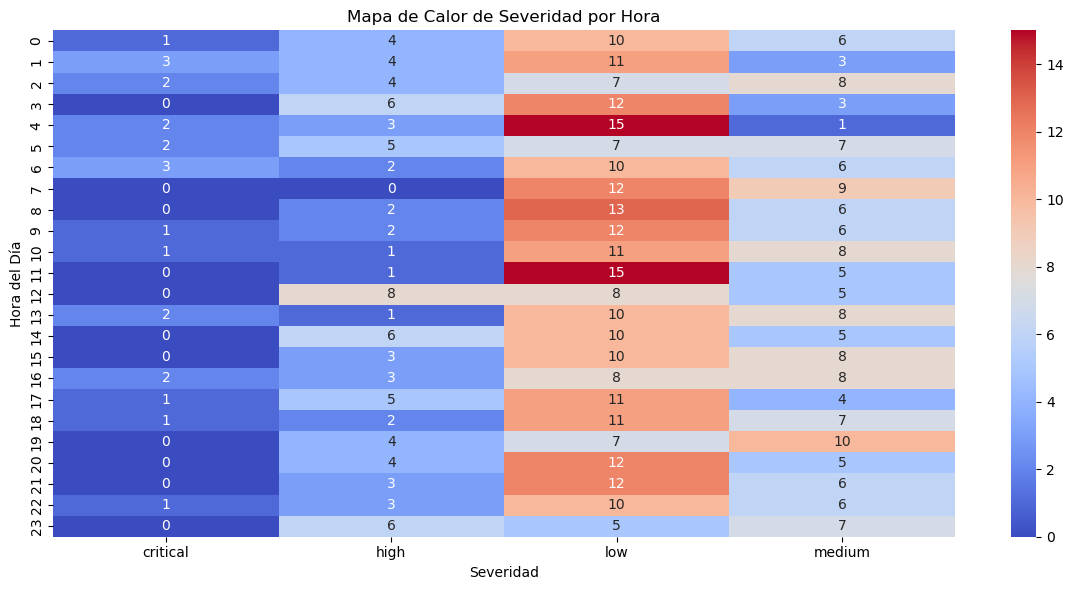

In [16]:
# Mapa de calor de eventos por hora y severidad
plt.figure(figsize=(12, 6))
heatmap_data = pd.crosstab(logs_df['hour'], logs_df['severidad'])
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='d')
plt.title('Mapa de Calor de Severidad por Hora')
plt.xlabel('Severidad')
plt.ylabel('Hora del Día')
plt.tight_layout()
plt.show()

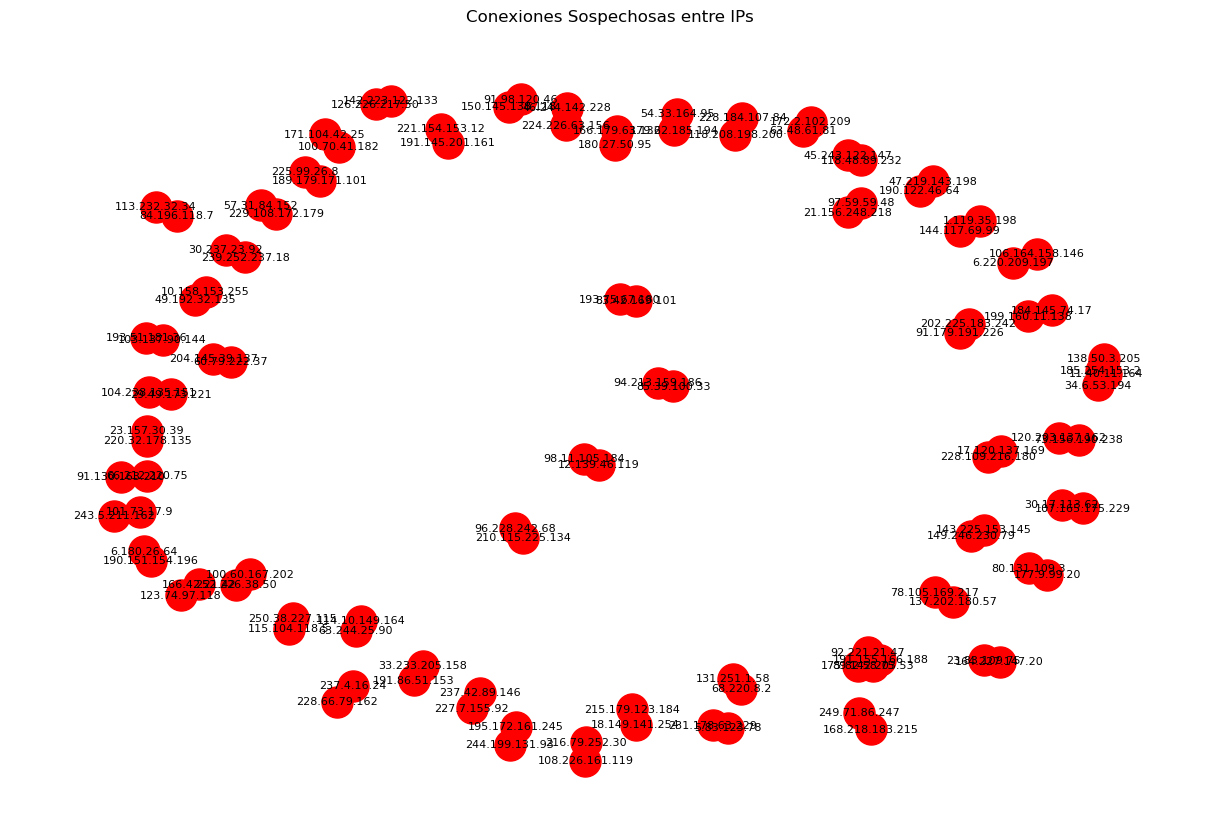

Visualizaciones generadas correctamente.


In [17]:
# Gráfico de red de conexiones entre IPs sospechosas
G = nx.Graph()
suspicious_events = logs_df[logs_df['evento'].isin(['suspicious_activity', 'malware_detected', 'port_scan'])]
for _, row in suspicious_events.iterrows():
    G.add_edge(row['ip_origen'], row['ip_destino'])

plt.figure(figsize=(12, 8))
nx.draw(G, with_labels=True, node_size=500, node_color='red', edge_color='gray', font_size=8)
plt.title('Conexiones Sospechosas entre IPs')
plt.show()

print("Visualizaciones generadas correctamente.")